# Derivación numérica aplicando diferencias centradas de segundo orden, cuarto orden, hacia adelante y atrás $ f(x) $

1. Se importan las librerías a utilizar

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from matplotlib.pyplot import figure
import tikzplotlib
import math as mt
from time import process_time_ns
from mpl_toolkits.axes_grid1.inset_locator import (zoomed_inset_axes, InsetPosition, mark_inset)
init_session(use_latex=True)

IPython console for SymPy 1.4 (Python 3.7.4-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



Se crean las variables simbólicas para proporcionar una visualización de la ecuación en la que se piensa trabajar

In [2]:
F, F1, F2, X = symbols('F, F1, F2, X')

A continuación se inicializan las variables como son la mínima cantidad de nodos, esto debido a que a menor número se presenta un resultado poco fiable, y el máximo número de nodos.

In [3]:
ni = 60
n = 500
dx = np.zeros(n-ni)
t = np.zeros([n-ni,n-1])
x = np.zeros([n-ni,n-1])
der2x = np.zeros([n-ni,n-1])

k = 0

for i in range(ni, n):
    dx[k] = (20-0)/(i-1)
    tt = np.linspace(0, 20, i)
    for j in range(i):
        t[k,j] = tt[j]
    k = k + 1


2. Se intruduce la ecuación $f(x) = sen(3x) + cos(\frac{x^2}{2} - 3x)$ la cual tiene una estructura con funciones trigonométricas. Se realiza la derivación para obtener $f^{\prime \prime} (x)$

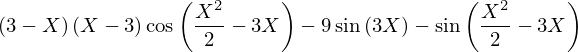

In [4]:
F = sin(3*X) + cos((X**2/2) - 3*X)
F1 = F.diff(X)
F2 = F1.diff(X)
F2

En este punto se busca evaluar los puntos del vertor posición en $f(x)$ y en $f^{\prime \prime}(x)$ para posteriormente graficar la función y calcular el error.

In [5]:
k = 0
for i in range(ni, n):
    for j in range(i):
        x[k,j] = mt.sin(3*t[k,j]) + mt.cos(((t[k,j]**2)/2) - 3*t[k,j])
        der2x[k,j] = (3-t[k,j])*(t[k,j]-3)*mt.cos(((t[k,j]**2)/2)-3*t[k,j]) - 9*mt.sin(3*t[k,j]) - sin(((t[k,j]**2)/2) - 3*t[k,j])
    k = k + 1

3. Se crean las matrices para cada caso y se realiza el producto punto entre la matriz y el vector posición de acuerdo a las ecuaciones para cada esquema

* Segundo Orden en diferencias centradas: $$f^{\prime \prime}(t) = [f(t + \Delta t) -  2f(t) + f(t - \Delta t)]/ \Delta t^2$$ 
* Cuarto Orden en diferencias centradas: $$f^{\prime \prime}(t) = [-f(t + 2 \Delta t) + 16 f(t + \Delta t) -  30f(t) + 16 f(t - \Delta t) - f(t - 2 \Delta t)]/12 \Delta t^2$$
* Diferencia hacia adelante: $$f^{\prime \prime}(t) = [2f(t) - 5f(t + \Delta t) + 4f(t + 2 \Delta t) - f(t + 3 \Delta t)]/ \Delta t^2 $$
* Diferencia hacia atrás: $$f^{\prime \prime}(t) = [2f(t) - 5f(t - \Delta t) + 4f(t - 2 \Delta t) - f(t - 3 \Delta t)]/ \Delta t^2 $$


In [6]:
k = 0
total_time = np.zeros(n-ni)
error_x1 = np.zeros(n-ni)
error_x2 = np.zeros(n-ni)
error_x3f = np.zeros(n-ni)
error_x3b = np.zeros(n-ni)

for i in range(ni, n):
    start = 0
    stop = 0
    
    start = process_time_ns()
    
    D21 = np.zeros([i,i])
    D22 = np.zeros([i,i])
    D23f = np.zeros([i,i])
    D23b = np.zeros([i,i])
    xx = np.zeros(i)
    der_exac = np.zeros(i)
    
    for j in range(i):
        if j < i-1:
            D21[j, j+1] = 1
            D21[j+1, j] = 1
        D21[j, j] = -2
    
        if j < i-1:
            D22[j, j+1] = 16
            D22[j+1, j] = 16
        if j < i-2:
            D22[j, j+2] = -1
            D22[j+2, j] = -1
    
        D22[j, j] = -30

        D23f[j, j] = 2
        if j < i-1:
            D23f[j, j+1] = -5
        if j < i-2:
            D23f[j, j+2] = 4    
        if j < i-3:
            D23f[j, j+3] = -1

        D23b[j, j] = 2
        if j < i-1:
            D23b[j+1, j] = -5
        if j < i-2:
            D23b[j+2, j] = 4    
        if j < i-3:
            D23b[j+3, j] = -1
    
    for l in range(ni+k):
        xx[l] = x[k,l]
        der_exac[l] = der2x[k,l]
    
    
    derx2_a1 = D21.dot(xx.reshape(-1, 1))/(dx[k]**2)
    derx2_a1 = np.delete(derx2_a1, [0, i-1])
    derx2_a2 = D22.dot(xx.reshape(-1, 1))/(12*dx[k]**2)
    derx2_a2 = np.delete(derx2_a2, [0, 1, i-1, i-2])
    derx2_a3f = D23f.dot(xx.reshape(-1, 1)/dx[k]**2)
    derx2_a3f = np.delete(derx2_a3f, [i-1, i-2, i-3])
    derx2_a3b = D23b.dot(xx.reshape(-1, 1)/dx[k]**2)
    derx2_a3b = np.delete(derx2_a3b, [0, 1, 2])
    
    error_x1[k] = np.mean(abs(abs(der_exac[1:i-1] - derx2_a1)/(der_exac[1:i-1]))*100)
    error_x2[k] = np.mean(abs(abs(der_exac[2:i-2] - derx2_a2)/(der_exac[2:i-2]))*100)
    error_x3f[k] = np.mean(abs(abs(der_exac[:i-3] - derx2_a3f)/(der_exac[:i-3]))*100)
    error_x3b[k] = np.mean(abs(abs(der_exac[3:] - derx2_a3b)/(der_exac[3:]))*100)
    
    stop = process_time_ns()
    total_time[k] = stop-start
    
    k = k + 1

5. Se crea la gráfica la cual es el resultado de la derivación numérica para obtener la segunda derivada. Se comparan los cuatro esquemas con la solución exacta.

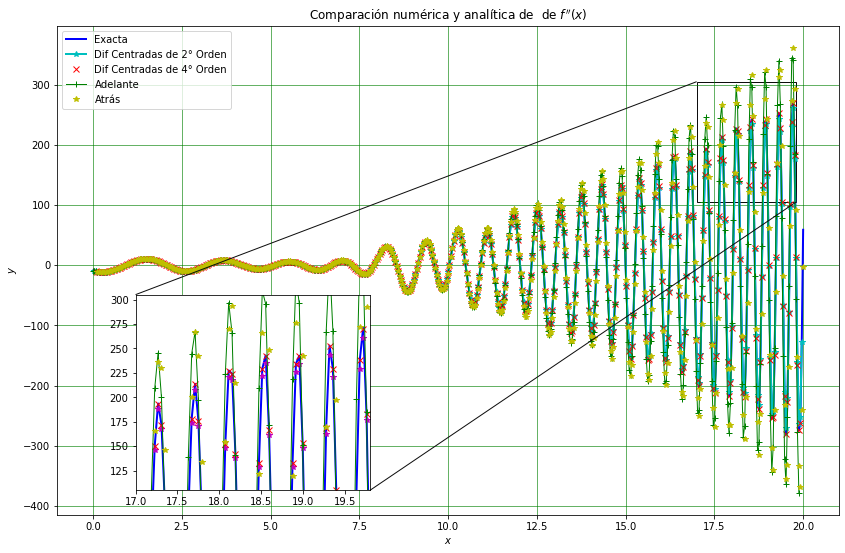

In [7]:
fig, ax1 = plt.subplots(figsize=(14,9))

ax1.plot(t[n-ni-1,:], der2x[n-ni-1,:], "-", lw=2, color = 'b', label = 'Exacta')
ax1.plot(t[n-ni-1,1:n-2], derx2_a1, "*-", lw=2, color = 'c', label = 'Dif Centradas de 2° Orden')
ax1.plot(t[n-ni-1,2:n-3], derx2_a2, "x", lw=3, color = 'r', label = 'Dif Centradas de 4° Orden')
ax1.plot(t[n-ni-1,:n-4], derx2_a3f, "-+", lw=1, color = 'g', label = 'Adelante')
ax1.plot(t[n-ni-1,3:], derx2_a3b, "*", lw=2, color = 'y', label = 'Atrás')
ax1.legend(loc=2)
ax1.set_title('Comparación numérica y analítica de  de $f^{\prime \prime}(x)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.grid(color='g', linestyle='-', linewidth=0.6)

ax2 = zoomed_inset_axes(ax1, 3, loc=1)
ip = InsetPosition(ax1, [0.1,0.05,0.3,0.4])
ax2.set_axes_locator(ip)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.05')

ax2.plot(t[n-ni-1,:], der2x[n-ni-1,:], "-", lw=2, color = 'b', label = 'Exacta')
ax2.plot(t[n-ni-1,1:n-2], derx2_a1, "*", lw=5, color = 'm', label = 'Dif Centradas de 2° Orden')
ax2.plot(t[n-ni-1,2:n-3], derx2_a2, "x", lw=3, color = 'r', label = 'Dif Centradas de 4° Orden')
ax2.plot(t[n-ni-1,:n-4], derx2_a3f, "-+", lw=1, color = 'g', label = 'Adelante')
ax2.plot(t[n-ni-1,3:], derx2_a3b, "*", lw=2, color = 'y', label = 'Atrás')
ax2.set_xlim(17, 19.8)
ax2.set_ylim(105, 305)

plt.rcParams.update({'font.size': 11})

tikzplotlib.save("Figure1.tex")

# Análisis de gráfica anterior
* Se puede inferir que en la parte inicial de la gráfica se presenta un comportamiento suave y los esquemas logran adecuarse a la solución excata.
* En la parte final de la gráfica, ésta presenta un comportamiento bursco, donde su amplitud cambia rapidamente, esto ocasiona que solo los esquemas más rígidos logren un mejor acercamiento a la curva exacta, entre los que destacan los de diferencias centradas de segundo orden y cuarto orden, donde éste último logra el mejor desempeño.
* Se puede apreciar en el recuadro del zoom aplicado a la gráfica, que los esquemas de diferencias hacia adelante y atrás, presentan desviaciones ante cambios bruscos, aunque en las demás partes de la gráfica logran adecuarse a los cambios

7. Ahora se procede a calcular el error de la derivación numérica para cada uno de los esquemas aplicando la siguiente ecuación:

$$\epsilon = \frac{Valor Verdadero - Valor Estimado}{Valor Verdadero}$$

In [8]:
error_x1i = abs(abs(der2x[n-ni-1,1:n-2] - derx2_a1)/(der2x[n-ni-1,1:n-2]))*100
error_x2i = abs(abs(der2x[n-ni-1,2:n-3] - derx2_a2)/(der2x[n-ni-1,2:n-3]))*100
error_x3fi = abs(abs(der2x[n-ni-1,:n-4] - derx2_a3f)/(der2x[n-ni-1,:n-4]))*100
error_x3bi = abs(abs(der2x[n-ni-1,3:] - derx2_a3b)/(der2x[n-ni-1,3:]))*100

Gráfica de los errores contra el vector posición para la última iteración del sistema

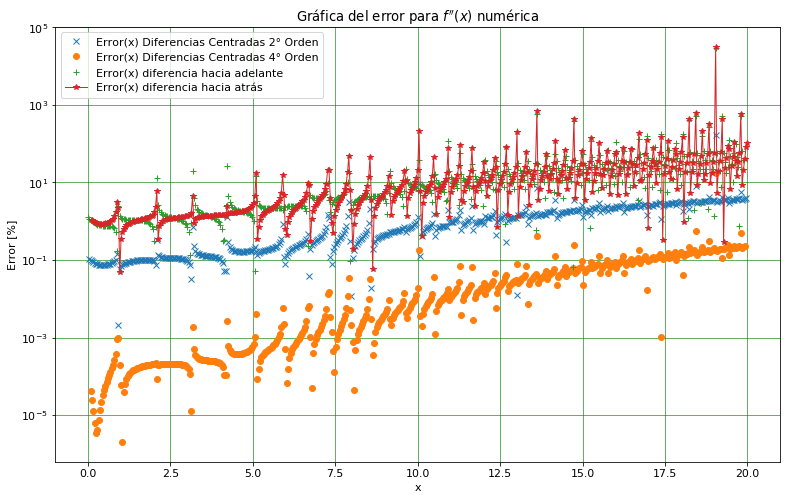

In [9]:
figure(figsize=(13,8))

plt.plot(t[n-ni-1,1:n-2], error_x1i, "x", lw=3, label = 'Error(x) Diferencias Centradas 2° Orden')
plt.plot(t[n-ni-1,2:n-3], error_x2i, "o", lw=3, label = 'Error(x) Diferencias Centradas 4° Orden')
plt.plot(t[n-ni-1,:n-4], error_x3fi, "+", lw=3, label = 'Error(x) diferencia hacia adelante')
plt.plot(t[n-ni-1,3:], error_x3bi, "*-", lw=1, label = 'Error(x) diferencia hacia atrás')
plt.legend(loc=2)
plt.title('Gráfica del error para $f^{\prime \prime}(x)$ numérica')
plt.xlabel('x')
plt.ylabel('Error [%]')
plt.yscale("log")
plt.grid(color='g', linestyle='-', linewidth=0.6)

# Análisis de gráfica anterior
* Se presenta la gráfica del error en funcion del vector posición para los esquemas descritos.
* Se puede observar que el esquema con el mejor desempeño es el de diferencias centradas de cuarto orden.
* En todos los esquemas se evidencia la tendencia en el incremento del error debido al aumento en las fluctuasiones de la gráfica.
* Para los esquemas de diferencias hacia adelante y atrás presentan comportamientos muy similares pero con mayor grado en comparación con los de diferencias centradas.
* La gráfica se presenta en forma logarítmica en el eje del error para apreciar el resultado debido a la variación del mismo.

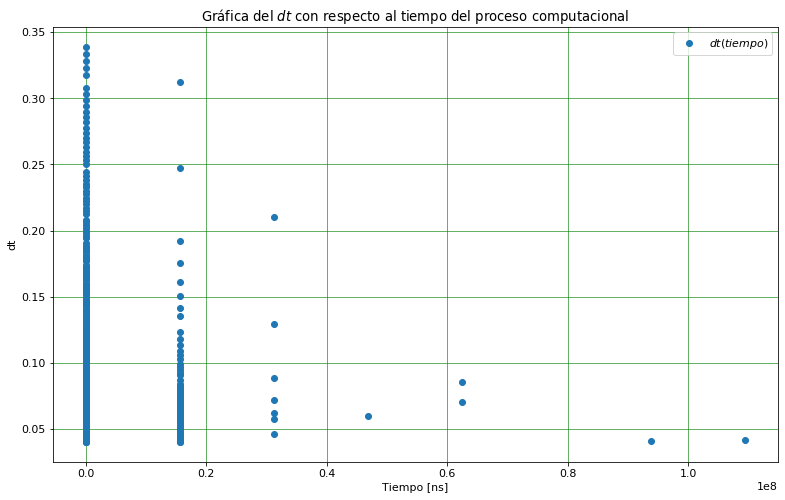

In [10]:
figure(figsize=(13,8))

plt.plot(total_time, dx, "o", lw=3, label = '$dt(tiempo)$')
plt.legend(loc=1)
plt.title('Gráfica del $dt$ con respecto al tiempo del proceso computacional')
plt.xlabel('Tiempo [ns]')
plt.ylabel('dt')
plt.grid(color='g', linestyle='-', linewidth=0.6)

# Análisis de gráfica anterior
* Se presenta la gráfica que muestra el $dt$ con respecto al tiempo computacional
* Se visualiza que los datos se acumulan en un mismo lugar en siete diferentes puntos y esto debido a que los tiempos son muy pequeños y la mayor cantidad los aproxima a cero a pesar de que la escala esta en nanosegundos.
* La mayor cantidad se presentan en un tiempo aproximado a cero.
* No se evidencia un mayor consumo de recursos al reducir el valor del $dt$

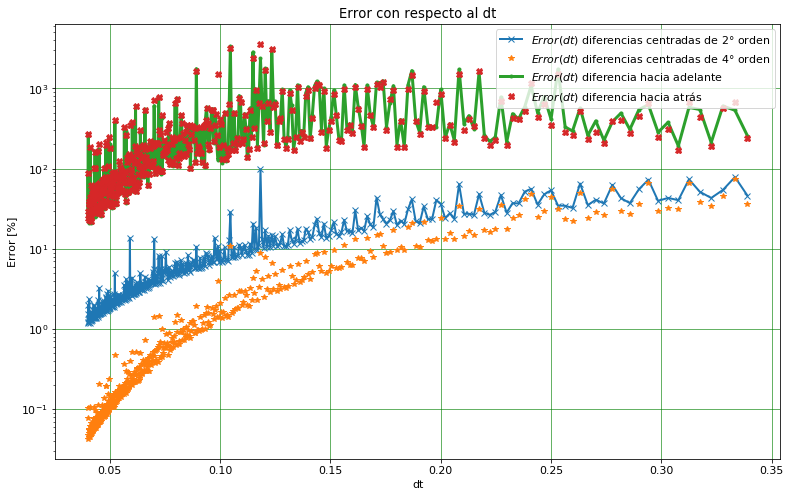

In [14]:
figure(figsize=(13,8))

plt.plot(dx, error_x1, "x-", lw=2, label = '$Error(dt)$ diferencias centradas de 2° orden')
plt.plot(dx, error_x2, "*", lw=3, label = '$Error(dt)$ diferencias centradas de 4° orden' )
plt.plot(dx, error_x3f, ".-", lw=3, label = '$Error(dt)$ diferencia hacia adelante')
plt.plot(dx, error_x3b, "X", lw=3, label = '$Error(dt)$ diferencia hacia atrás')
plt.legend(loc=1)
plt.title('Error con respecto al dt')
plt.xlabel('dt')
plt.ylabel('Error [%]')
plt.yscale("log")
plt.grid(color='g', linestyle='-', linewidth=0.6)

# Análisis de gráfica anterior
* Con respecto a la gráfica del error contra el dt se presenta una clara tendencia a la disminución del error al reducir el valor del dt.
* Como en las anteriores la tendencia es la misma por parte de los esquemas.